![title](logo.PNG)

# Name : Adesh Lahanu Navale

# Task 1 : Prediction using Supervised ML

### 1) Predict the percentage of a student based on the no. of study hours.
### 2) What will be predicted score if a student studies for 9.25 hrs/ day?



### Importing Required Libraries

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from scipy import stats

### Importing The DataSet

In [2]:
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)

### Display The Data From The DataSet

In [3]:
Data.head() # First 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Last 5 Rows

In [4]:
Data.tail()  # last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Description of dataset

In [5]:
Data.describe()   # able to see mathematical insights of data.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Dimensions of the Dataset

In [6]:
Data.shape

(25, 2)

### Summary of The Dataset

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###  Visualization of Data

<AxesSubplot:>

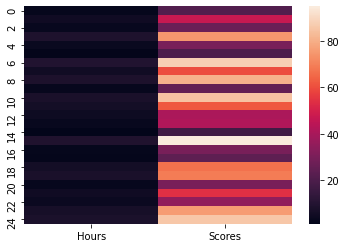

In [8]:
sns.heatmap(data=Data)

### Calculate correlations

<AxesSubplot:>

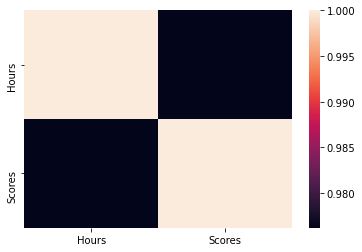

In [9]:
corr = Data.corr()
sns.heatmap(corr)

#### From the above graph ,we can clearly see that there is a positive linear relation between the number of hours and studied and percentage of score

### Scatterplot for checking the Outlires

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

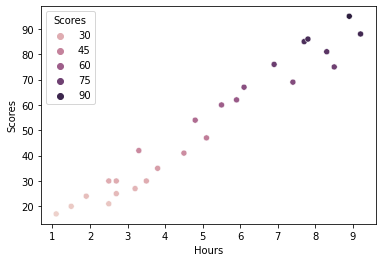

In [10]:
sns.scatterplot(x = 'Hours', y = 'Scores', data = Data,hue="Scores")

#### There are No Outlires In The Data

### Dividing The Data Into Attributes And Labels 

In [11]:
X = Data.iloc[:, :-1].values    
y = Data.iloc[:, 1].values  

#### The split of data into the training and test sets is very important as in this time we will be using Scikit Learn's builtin method of train_test_split()

In [12]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Train The Algorithm

In [13]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, y_train)   
  
print("Training Completed !....")

Training Completed !....


### Plotting Test Data Using The Previously Trained Test Data

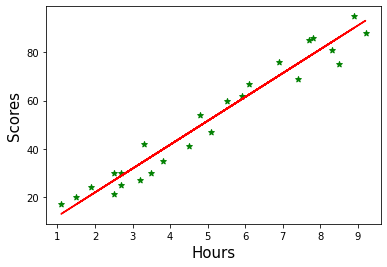

In [14]:
line = regressor.coef_*X+regressor.intercept_  
plt.scatter(X, y,color='green',marker='*')  
plt.plot(X, line,color='red');  
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show() 

### Predicting The Scores For The Model

In [15]:
print(X_test)   
y_pred = regressor.predict(X_test)  

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing The Actual Versus Predicted Model To Understand Our Model Fitting

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df  

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Test Model(Predicting The Score)

In [17]:
hours = [[9.25]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 93.69173248737538


### Accuracy Of The Model

In [18]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

### Accuracy of The Model Is 94 % 

### Error Evaluation

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


### CONCLUSION

### We can conclude that if student studies for 9.25 hrs/ day will secured 93.69 Marks.